# Feature Engineering & Model Selection

##### [TOTAL POINTS: 22]

##  Learning Objectives

By the end of this assignment, students should be able to:

* Apply necessary preprocessing steps to prepare the data for modeling.
* Perform feature engineering such as handling missing values, binning numerical variables, and extracting new features.
* Train and fine-tune a **Decision Tree classifier** using **scikit-learn**, and evaluate it using **cross-validation** and **validation splits**.
* Evaluate and compare multiple classification models (e.g., **Random Forest**, **XGBoost**) and build an effective **ensemble model**.

## Problem Description

The **Titanic** was a British passenger liner that tragically sank during its maiden voyage in 1912. The dataset you'll work with contains information about the passengers on board — such as their age, sex, ticket class, and whether they survived.

Your task is to build a machine learning pipeline to **predict whether a passenger survived the Titanic disaster** using the provided features. Throughout the assignment, you will preprocess the data, engineer meaningful features, build various classifiers, and evaluate their performance.

Let’s begin by importing the necessary libraries.

In [2]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost scikit-optimize -q

In [3]:
# Task: Import necessary libraries for data analysis 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

%matplotlib inline
sns.set()

### Load the Dataset <span style="float: right;">[1 pt]</span>

Load the `train.csv` and `test.csv` files using pandas.

In [4]:
### Ex-1-Task-1
# Load the Titanic dataset

df_train = None
df_test = None

# YOUR CODE HERE
### BEGIN SOLUTION 
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
### END SOLUTION
# raise NotImplementedError() 

df_train.info(),df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

(None, None)

In [5]:
# INTENTIONALLY LEFT BLANK

### Store Target & Concatenate Datasets <span style="float: right;">[1 pt]</span>

- Store the `Survived` column from the training set into a separate variable.
- Concatenate the training set (without the `Survived` column) and the test set into a single DataFrame called `data`.


In [6]:
### Ex-1-Task-2
# Task: Store the target variable in a separate variable and concatenate train and test data

survived_train = None
data = None

# YOUR CODE HERE
### BEGIN SOLUTION
train_columns = [col for col in df_train.columns if col != "Survived"]
survived_train = df_train["Survived"]
data = pd.concat((df_train[train_columns],df_test),axis=0) 
### END SOLUTION
# raise NotImplementedError() 

In [7]:
# INTENTIONALLY LEFT BLANK

In [8]:
# Task: View basic info of the concatenated dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Pclass       1309 non-null   int64  
 2   Name         1309 non-null   object 
 3   Sex          1309 non-null   object 
 4   Age          1046 non-null   float64
 5   SibSp        1309 non-null   int64  
 6   Parch        1309 non-null   int64  
 7   Ticket       1309 non-null   object 
 8   Fare         1308 non-null   float64
 9   Cabin        295 non-null    object 
 10  Embarked     1307 non-null   object 
dtypes: float64(2), int64(4), object(5)
memory usage: 122.7+ KB


### Extract Title from Name <span style="float: right;">[2 pts]</span>
 
Extract the passenger's title (such as **Mr**, **Mrs**, **Miss**, etc.) from the `Name` column using a regular expression,  
and store it in a new column called `Title`.

For example, given names like:  
- `Braund, Mr. Owen Harris` → Title: `Mr`
- `Heikkinen, Miss. Laina` → Title: `Miss`

Use a regex pattern that captures the word that appears between a space and a period following the surname.

In [9]:
### Ex-2-Task-1
# Task: Extract 'Title' from Name column and plot distribution

data['Title'] = None

# YOUR CODE HERE
### BEGIN SOLUTION
data["Title"]=[re.search(pattern=r'[\w]+\.',string=Name).group()[:-1] for Name in data["Name"]]
data["Title"].head()
### END SOLUTION
# raise NotImplementedError() 

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [10]:
# INTENTIONALLY LEFT BLANK

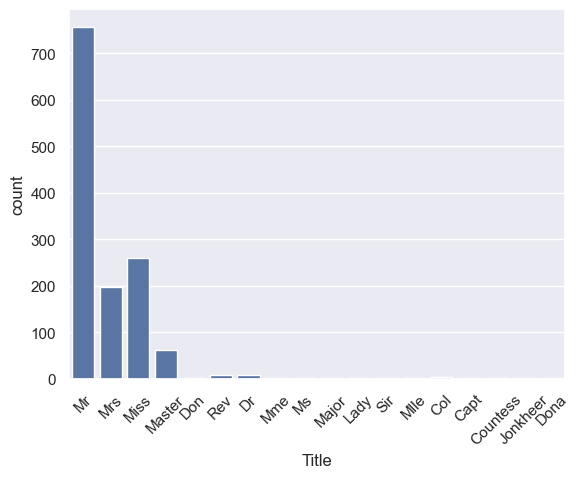

In [11]:
# Task: Plot the title count
sns.countplot(x='Title', data=data)
plt.xticks(rotation=45)
plt.show()

### Normalize and Group Titles <span style="float: right;">[2 pts]</span>
 
- Normalize similar titles by replacing:  
    - `'Mlle'` with `'Miss'`  
    - `'Mme'` with `'Mrs'`  
    - `'Ms'` with `'Miss'`

- Then, group rare titles such as `'Don'`, `'Dona'`, `'Rev'`, `'Dr'`, `'Major'`, `'Lady'`, `'Sir'`, `'Col'`, `'Capt'`, `'Countess'`, and `'Jonkheer'` into a single category called `'Special'`.


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Special')])

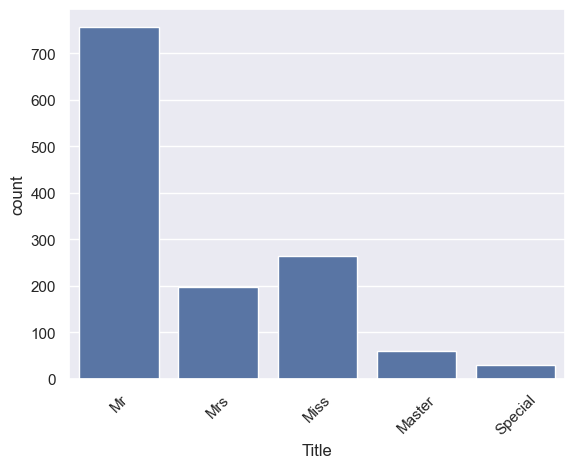

In [12]:
### Ex-2-Task-2
# Task: Normalize rare titles to 'Special' and others

# YOUR CODE HERE
### BEGIN SOLUTION 
replacement = {'Mlle':"Miss","Mme":"Mrs","Ms":"Miss","Mr":"Mr","Miss":"Miss","Master":"Master","Mrs":"Mrs"}
data["Title"]=data["Title"].apply(lambda x: replacement.get(x,"Special"))
sns.countplot(x=data["Title"])
plt.xticks(rotation=45)
### END SOLUTION
# raise NotImplementedError() 

In [13]:
# INTENTIONALLY LEFT BLANK

### Create Binary Cabin Indicator  <span style="float: right;">[1 pt]</span>

Create a new binary column `Has_Cabin` that indicates whether a passenger has cabin information (`True` if present, `False` if missing).

C:\Users\hooman\AppData\Local\Temp\ipykernel_14732\1963293641.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Has_Cabin'] = data['Cabin'].replace(r'.*',True,regex=True).fillna(False)


<Axes: xlabel='Has_Cabin', ylabel='count'>

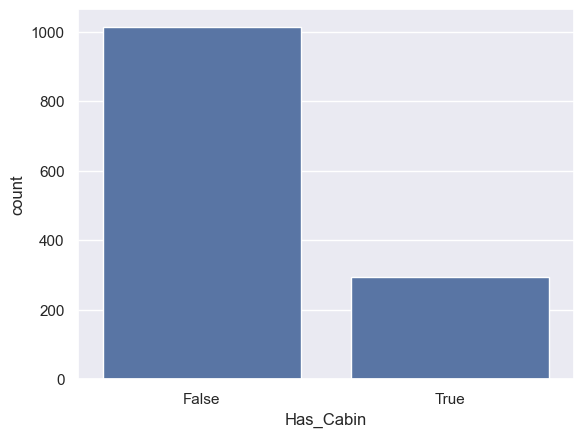

In [14]:
### Ex-3-Task-1
# Task: Add a binary column for presence of Cabin info

data['Has_Cabin'] = None

# YOUR CODE HERE
### BEGIN SOLUTION 
data['Has_Cabin'] = data['Cabin'].replace(r'.*',True,regex=True).fillna(False)
sns.countplot(x=data["Has_Cabin"])
### END SOLUTION
# raise NotImplementedError() 

In [15]:
# INTENTIONALLY LEFT BLANK

In [16]:
# Task: Drop irrelevant columns
data.drop(['Cabin', 'Name', 'PassengerId', 'Ticket'], axis=1, inplace=True)

### Impute Missing Values  <span style="float: right;">[2 pts]</span>

Fill missing values in the dataset as follows:  
- Replace missing `Age` values with the median age.  
- Replace missing `Fare` values with the median fare.  
- Replace missing `Embarked` values with the most common port `'S'`.

In [17]:
### Ex-4-Task-1
# Task: Impute missing values in Age, Fare, Embarked

# YOUR CODE HERE
### BEGIN SOLUTION
data["Age"].fillna(data["Age"].median(),inplace=True) 
data["Fare"].fillna(data["Fare"].median(),inplace=True)
data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)
### END SOLUTION
# raise NotImplementedError() 


C:\Users\hooman\AppData\Local\Temp\ipykernel_14732\1033344009.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Age"].fillna(data["Age"].median(),inplace=True)
C:\Users\hooman\AppData\Local\Temp\ipykernel_14732\1033344009.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



In [18]:
# INTENTIONALLY LEFT BLANK

### Bin Age and Fare into Categories  <span style="float: right;">[2 pts]</span>

- Convert the numerical columns `Age` and `Fare` into categorical variables by dividing them into 4 equal-sized groups (quartiles).  
- Store the group labels in new columns `CatAge` and `CatFare`.  
- Drop the original `Age` and `Fare` columns after binning.

In [19]:
### Ex-4-Task-2
# Task: Bin Age and Fare into categorical variables

data['CatAge'] = None
data['CatFare'] = None

# YOUR CODE HERE
### BEGIN SOLUTION 
data['CatAge']=pd.qcut(data["Age"],q=4,labels=False)+1
data['CatFare']=pd.qcut(data["Fare"],q=4,labels=False)+1
data.drop(columns=["Age","Fare"],inplace=True)
### END SOLUTION
# raise NotImplementedError() 

In [20]:
# INTENTIONALLY LEFT BLANK

### Create Family Size and Drop Columns  <span style="float: right;">[1 pt]</span>

Create a new column `Fam_Size` by summing `SibSp` and `Parch`, then drop the original `SibSp` and `Parch` columns.

In [21]:
### Ex-5-Task-1 
# Task: Create family size and drop SibSp, Parch

# YOUR CODE HERE
### BEGIN SOLUTION
data["Fam_Size"] = data["SibSp"]+data["Parch"]
data.drop(columns=["SibSp","Parch"],inplace=True)
### END SOLUTION
# raise NotImplementedError() 

In [22]:
# INTENTIONALLY LEFT BLANK

### One-Hot Encode Categorical Variables  <span style="float: right;">[1 pt]</span>

Convert categorical variables into one-hot encoded dummy variables, dropping the first category to avoid multicollinearity.


In [23]:
### Ex-5-Task-2

data_dum = None

# YOUR CODE HERE
### BEGIN SOLUTION
data_dum = pd.get_dummies(data,drop_first=True) 
### END SOLUTION
# raise NotImplementedError() 

In [24]:
# INTENTIONALLY LEFT BLANK

In [25]:
# Task: Split data into training and test sets
data_train = data_dum.iloc[:891]
data_test = data_dum.iloc[891:]

X = data_train.values
test = data_test.values
y = survived_train.values

### Tune Decision Tree with RandomizedSearchCV  <span style="float: right;">[3 pts]</span>

- Use `RandomizedSearchCV` to tune a `DecisionTreeClassifier`’s `max_depth` parameter, searching over values from 1 to 9, with a fixed random seed. 
- Perform 5 iterations with 5-fold cross-validation and fit the model to the training data.

**Note:** Import libraries inside `begin solution` and `end solution`

In [31]:
### Ex-6-Task-1

seed=42
np.random.seed(seed)

param_dist = {}
clf = None     # Decision Tree Classifier 
clf_cv = None  # Randomized Search CV

# YOUR CODE HERE
### BEGIN SOLUTION 
param_dist = {'max_depth':np.arange(1,9,1)}
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
clf = DecisionTreeClassifier()
# clf.fit(data_train, y)
clf_cv = RandomizedSearchCV(clf, param_distributions=param_dist, cv=5, n_jobs=-1, refit=True)
clf_cv.fit(data_train,y)
### END SOLUTION
# raise NotImplementedError() 

print("Tuned Decision Tree Parameters: {}".format(clf_cv.best_params_))
print("Best score is {}".format(clf_cv.best_score_))

Tuned Decision Tree Parameters: {'max_depth': np.int64(3)}
Best score is 0.8293766869625259


c:\Users\hooman\miniconda3\envs\fuse\Lib\site-packages\sklearn\model_selection\_search.py:317: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [32]:
# INTENTIONALLY LEFT BLANK

### Tune Random Forest with RandomizedSearchCV  <span style="float: right;">[3 pts]</span>
 
Use `RandomizedSearchCV` to tune a `RandomForestClassifier` with parameters:  
- `n_estimators`: [50, 100, 200]  
- `max_depth`: [None, 3, 5, 10]  
- `max_features`: ['sqrt', 'log2']  

Use a fixed random seed, run 5 iterations with 5-fold cross-validation, and fit the model.


In [35]:
### Ex-6-Task-2

rf_param_dist = {}
rf = None     # Random Forest Classifier 
rf_cv = None  # Randomized Search CV

# YOUR CODE HERE
### BEGIN SOLUTION 
rf_param_dist = {"n_estimators":[50,100,200],"max_depth":[None,3,5,10],"max_features":['sqrt','log2']}
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf_cv = RandomizedSearchCV(rf,param_distributions=rf_param_dist,n_iter=5,cv=5,refit=True,n_jobs=-1)
rf_cv.fit(data_train,y)
### END SOLUTION
# raise NotImplementedError() 

print("Best RF Params:", rf_cv.best_params_)
print("Best CV Score:", rf_cv.best_score_)

Best RF Params: {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 5}
Best CV Score: 0.8271357730211537


In [36]:
# INTENTIONALLY LEFT BLANK

### Tune XGBoost with Bayesian Optimization  <span style="float: right;">[3 pts]</span>

Use `BayesSearchCV` from `scikit-optimize` to tune an `XGBClassifier`.  
Search over the following hyperparameter space:

- `max_depth`: integers between 3 and 8  
- `n_estimators`: integers between 50 and 100  
- `learning_rate`: log-uniformly between 0.01 and 0.2  

Use 5-fold cross-validation, a fixed random seed, and 20 iterations. Then, fit the model.

In [ ]:
### Ex-6-Task-3

param_space = {}      # Parameter Distribuition for BayesSearchCV
xgb_model = None      # Random Forest Classifier 
xgb_cv = None         # BayesSearchCV

# YOUR CODE HERE
### BEGIN SOLUTION 
param_space = {
    "max_depth": (3, 8),
    "n_estimators": (50, 100),
    "learning_rate": (0.01, 0.2, 'log-uniform')
}
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
from skopt import BayesSearchCV
xgb_cv=BayesSearchCV(estimator=xgb_model,n_iter=20,random_state=42,cv=5,search_spaces=param_space)
xgb_cv.fit(data_train,y)
### END SOLUTION
# raise NotImplementedError() 

print("Best XGBoost Params:", xgb_cv.best_params_)
print("Best CV Score:", xgb_cv.best_score_)

c:\Users\hooman\miniconda3\envs\fuse\Lib\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
c:\Users\hooman\miniconda3\envs\fuse\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
c:\Users\hooman\miniconda3\envs\fuse\Lib\site-packages\sklearn\preprocessing\_label.py:302: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  self.y_type_ = type_of_target(y, input_name="y")
c:\Users\hooman\miniconda3\envs\fuse\Lib\site-packages\sklearn\utils\multiclass.py:79: UserWarning: The number of unique classes is greater than 50% of the number of samples.
  ys_types = set(type_of_target(x) for x in ys)
c:\Users\hooman\miniconda3\envs\fuse\Lib\site-packages\sklearn\preprocessing\_label.py:302: 

Best XGBoost Params: OrderedDict({'learning_rate': 1.023292992280754, 'max_depth': 7, 'n_estimators': 64})
Best CV Score: 0.8047140794677045


In [41]:
# INTENTIONALLY LEFT BLANK